In [1]:
import pandas as pd
import glob, os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno

In [2]:
ls crime_data_clean/new/

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime16_clean.csv*
Final_crime11_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*


In [3]:
path = 'crime_data_clean/new/'

In [4]:
all_files = glob.glob(os.path.join(path, "*.csv")) 

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:4: DtypeWarning: Columns (8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  after removing the cwd from sys.path.


In [5]:
df.head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
0,1959-06-06,18F20,5100-5199,RICHMOND,Theft,DEPARTMENT/DISCOUNT STORE,1.0,14.0,6,Saturday,Jun,1959
1,1966-01-01,10H50,3300-3399,ALABAMA,Rape,APARTMENT,1.0,0.0,1,Saturday,Jan,1966
2,1966-07-18,13D40,10200-10299,TELEPHONE,Auto Theft,APARTMENT PARKING LOT,1.0,13.0,18,Monday,Jul,1966
3,1969-07-22,2A30,1500-1599,NICHOLSON,Theft,RESIDENCE/HOUSE,1.0,0.0,22,Tuesday,Jul,1969
4,1969-11-26,3B50,7100-7199,IRVINGTON,Theft,ROAD/STREET/SIDEWALK,1.0,15.0,26,Wednesday,Nov,1969


In [6]:
len(df.year.unique())

74

In [7]:
df.year.unique()

array([1959, 1966, 1969, 1974, 1977, 1980, 1983, 1985, 1990, 1991, 1995,
       1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 1964, 1965, 1970, 1971, 1972, 1976, 1978,
       1979, 1981, 1988, 1992, 1993, 1973, 1975, 1982, 1987, 1989, 1994,
       1997, 2012, 2013, 2014, 2020, 2021, 2029, 1963, 1986, 2019, 2033,
       1914, 1920, 1924, 1984, '2014', '2019', 'NaT', 1915, 1916, 2015,
       1918, 1919, 1921, 1926, 2016, 1917, 1927, 1953, 2017], dtype=object)

In [8]:
df.month.unique()

array(['Jun', 'Jan', 'Jul', 'Nov', 'Feb', 'Apr', 'May', 'Oct', 'Sep',
       'Aug', 'Dec', 'Mar', 'NaT'], dtype=object)

In [9]:
df.year.value_counts(dropna=False).head()

2010    136357
2013    130200
2012    127486
2011    127168
2016    122423
Name: year, dtype: int64

In [10]:
df.weekday.value_counts(dropna=False)

Friday       154377
Monday       148218
Thursday     144822
Wednesday    144241
Tuesday      143440
Saturday     142584
Sunday       128644
NaT               4
Name: weekday, dtype: int64

In [11]:
df.month.value_counts(dropna=False)

Jul    88958
May    88471
Aug    88283
Dec    86742
Jan    85867
Oct    85075
Apr    83205
Jun    83013
Sep    81957
Nov    81739
Mar    81307
Feb    71709
NaT        4
Name: month, dtype: int64

In [12]:
df.day.value_counts(dropna=False).head()

1     34753
15    32135
20    31828
16    31651
2     31584
Name: day, dtype: int64

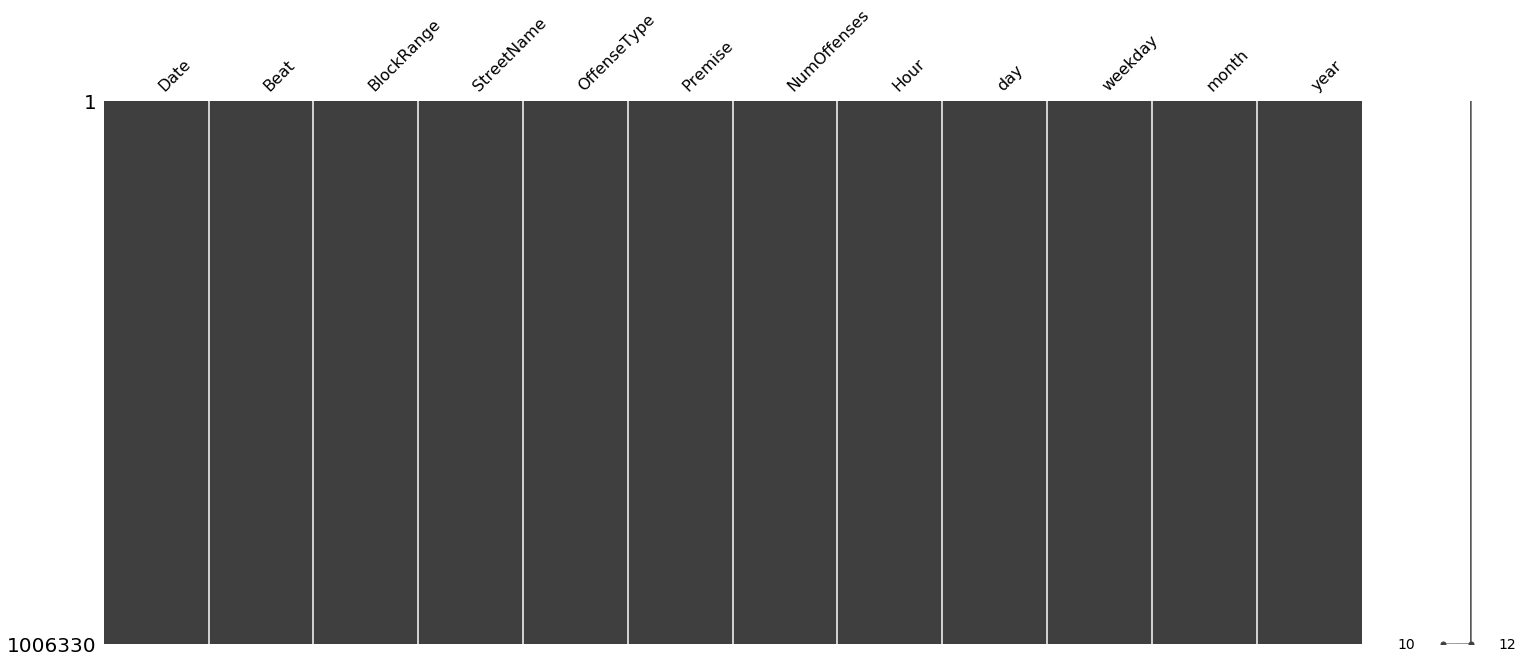

In [13]:
sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006330 entries, 0 to 1006329
Data columns (total 12 columns):
Date           1006326 non-null object
Beat           1006330 non-null object
BlockRange     1006173 non-null object
StreetName     1006304 non-null object
OffenseType    1006330 non-null object
Premise        1006330 non-null object
NumOffenses    1006330 non-null float64
Hour           1006330 non-null float64
day            1006330 non-null object
weekday        1006330 non-null object
month          1006330 non-null object
year           1006330 non-null object
dtypes: float64(2), object(10)
memory usage: 92.1+ MB


In [15]:
df.Date.unique()

array(['1959-06-06', '1966-01-01', '1966-07-18', ..., '2017-12-29',
       '2017-12-30', '2017-12-31'], dtype=object)

In [16]:
len(df[df.Date.isnull()])

4

In [17]:
len(df[df.Date.notnull()])

1006326

In [18]:
df[df.Date.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
643897,NaN,13D40,8500-8599,SAM HOUSTON,Theft,No label,1.0,15.0,NaT,NaT,NaT,NaT
643898,NaN,18F40,2700-2799,DUNVALE,Robbery,No label,1.0,14.0,NaT,NaT,NaT,NaT
643899,NaN,14D40,5600-5699,SELINSKY,Burglary,No label,1.0,8.0,NaT,NaT,NaT,NaT
643900,NaN,7C20,3900-3999,CAVALCADE,Theft,No label,1.0,11.0,NaT,NaT,NaT,NaT


In [19]:
df = df[df.Date.notnull()]

In [20]:
len(df[df.Date.isnull()])

0

## Set Date as index

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date').sort_index(ascending=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006326 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1006326 non-null object
BlockRange     1006169 non-null object
StreetName     1006300 non-null object
OffenseType    1006326 non-null object
Premise        1006326 non-null object
NumOffenses    1006326 non-null float64
Hour           1006326 non-null float64
day            1006326 non-null object
weekday        1006326 non-null object
month          1006326 non-null object
year           1006326 non-null object
dtypes: float64(2), object(9)
memory usage: 92.1+ MB


## Clenup index

In [23]:
df.tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2019-12-25,10H20,4600-4699,BELL,Auto Theft,DRIVEWAY,1.0,19.0,25,Wednesday,Dec,2019
2020-10-11,16E40,13900-13999,FONDREN,Theft,SERVICE/GAS STATION,1.0,22.0,11,Sunday,Oct,2020
2021-01-03,15E40,2100-2199,EL PASEO,Theft,APARTMENT,1.0,0.0,3,Sunday,Jan,2021
2029-05-26,2A50,5400-5499,PETTY,Theft,OTHER/UNKNOWN,1.0,3.0,26,Saturday,May,2029
2033-04-21,2A60,900-999,T C JESTER,Theft,RESIDENCE/HOUSE,1.0,0.0,21,Thursday,Apr,2033


### Remove non days

In [24]:
len(df[df.index.isnull()])

0

In [25]:
len(df[df.index.notnull()])

1006326

In [26]:
#df[df.index.isnull()]

In [27]:
#df = df[df.index.notnull()]

In [28]:
#len(df[df.index.isnull()])

In [29]:
df.day.value_counts(dropna=False).head()

1     34753
15    32135
20    31828
16    31651
2     31584
Name: day, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006326 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1006326 non-null object
BlockRange     1006169 non-null object
StreetName     1006300 non-null object
OffenseType    1006326 non-null object
Premise        1006326 non-null object
NumOffenses    1006326 non-null float64
Hour           1006326 non-null float64
day            1006326 non-null object
weekday        1006326 non-null object
month          1006326 non-null object
year           1006326 non-null object
dtypes: float64(2), object(9)
memory usage: 92.1+ MB


# Beat

In [31]:
len(df.Beat.unique())

127

In [32]:
df.Beat.unique()

array(['24C60', '18F60', '12D20', '3B10', '5F10', '1A20', '11H10',
       '19G20', '9C40', '9C30', '6B30', '10H70', '4F20', '20G30', '19G40',
       '18F20', '20G20', '17E20', '9C20', '19G10', '14D20', '8C20',
       '8C30', '17E40', '6B50', '12D70', 'UNK', '1A40', '7C10', '1A50',
       '10H40', '13D20', '18F10', '6B60', '10H50', '13D40', '2A30',
       '3B50', '19G50', '14D50', '1A10', '15E30', '12D50', '14D30',
       '8C60', '1A30', '18F40', '4F30', '20G50', '7C20', '3B30', '12D10',
       '15E10', '18F50', '14D10', '11H20', '5F30', '15E20', '23J50',
       '17E10', '6B10', '19G30', '18F30', '20G10', '2A40', '24C40',
       '14D40', '4F10', '10H60', '3B40', '10H80', '5F20', '16E40',
       '12D60', '6B40', '7C40', '13D30', '20G80', '10H20', '7C50',
       '15E40', '2A50', '8C50', '24C10', '20G40', '13D10', '7C30', '2A20',
       '20G70', '16E10', '12D30', '9C10', '16E30', '6B20', '2A10', '8C10',
       '21I20', '11H30', '24C20', '17E30', '10H30', '5F40', '2A60',
       '21I10', '10

# BlockRange

In [33]:
len(df.BlockRange.unique())

348

# StreetName

In [34]:
len(df.StreetName.unique())

24711

In [35]:
df.StreetName.unique()

array(['LAKE HOUSTON', 'BELLAIRE', 'GULF', ..., '32ND ST APT B',
       'HORWOOD', '66TH ST APT 5204'], dtype=object)

# OffenseType

In [36]:
len(df.OffenseType.unique())

8

In [37]:
df.OffenseType.unique()

array(['Burglary', 'Auto Theft', 'Theft', 'Rape', 'Aggravated Assault',
       'Robbery', 'Murder', 'UNK'], dtype=object)

In [38]:
df.OffenseType.value_counts(dropna=False)

Theft                 554369
Burglary              182240
Auto Theft            100894
Aggravated Assault     82971
Robbery                76783
Rape                    7129
Murder                  1926
UNK                       14
Name: OffenseType, dtype: int64

# Premise

In [39]:
len(df.Premise.unique())

265

In [40]:
df.Premise.unique()

array(['Restaurant or Cafeteria', 'Miscellaneous Business (Non-Specific)',
       'No label', 'Other Parking Lot', 'Apartment Parking Lot',
       'Office Building', 'Other, Unknown, or Not Listed',
       'Rental Storage Facility', 'Hotel or Motel Parking Lot',
       'Commercial Building', 'Apartment', 'Residence or House',
       'Road, Street, or Sidewalk',
       'Vacant Storage Fac (Barn,Garage,Warehouse)',
       'Commercial Parking Lot or Garage', 'Bar or Night Club',
       'Department or Discount Store',
       'Strip Business Center Parking Lot', 'DEPARTMENT/DISCOUNT STORE',
       'REHABILITATION CENTER', 'OTHER PARKING LOT', 'Convenience Store',
       'HOSPITAL', 'APARTMENT', 'APARTMENT PARKING LOT',
       'RESTAURANT/CAFETERIA', 'RESIDENCE/HOUSE', 'ROAD/STREET/SIDEWALK',
       'OTHER/UNKNOWN', 'Mobile Home', 'DRIVEWAY', '---',
       'MALL PARKING LOT', 'Grocery Store or Supermarket',
       'GROCERY/SUPERMARKET', 'AIRPORT TERMINAL',
       'Church, Synagogue, or Templ

# NumOffenses

In [41]:
len(df.NumOffenses.unique())

17

In [42]:
df.NumOffenses.unique()

array([ 1.,  2.,  4.,  3., 16.,  5.,  9.,  6., 13.,  7.,  8., 11., 29.,
       12., 17., 33., 10.])

In [43]:
df.NumOffenses.value_counts(dropna=False)

1.0     993650
2.0      10646
3.0       1611
4.0        247
5.0         80
6.0         46
7.0         15
8.0         10
9.0          4
13.0         4
16.0         3
10.0         3
12.0         2
17.0         2
11.0         1
33.0         1
29.0         1
Name: NumOffenses, dtype: int64

# Hour

In [44]:
len(df.Hour.unique())

25

In [45]:
df.Hour.unique()

array([ 7.,  3., 19., 22., 23., 10., 13., 16., 15., 17., 12.,  9., 14.,
       11., 18.,  5.,  8.,  6.,  0., 20.,  2., 21.,  1.,  4., 24.])

In [46]:
df.Hour.value_counts(dropna=False)  # need to  change 24 to 0

18.0    57416
12.0    57372
17.0    55942
15.0    55389
16.0    53942
19.0    52977
14.0    52428
20.0    51367
13.0    49751
22.0    48457
10.0    48215
11.0    47592
21.0    47300
9.0     45251
8.0     44967
0.0     43489
23.0    39759
7.0     36471
1.0     24245
6.0     24008
2.0     22512
3.0     17646
5.0     15499
4.0     14327
24.0        4
Name: Hour, dtype: int64

### Cleanup Hour

In [47]:
# change from 24 to 0

df.Hour = df.Hour.replace(24,0)

In [48]:
len(df.Hour.unique())

24

In [49]:
df.Hour.unique()

array([ 7.,  3., 19., 22., 23., 10., 13., 16., 15., 17., 12.,  9., 14.,
       11., 18.,  5.,  8.,  6.,  0., 20.,  2., 21.,  1.,  4.])

In [50]:
df.Hour.value_counts(dropna=False)

18.0    57416
12.0    57372
17.0    55942
15.0    55389
16.0    53942
19.0    52977
14.0    52428
20.0    51367
13.0    49751
22.0    48457
10.0    48215
11.0    47592
21.0    47300
9.0     45251
8.0     44967
0.0     43493
23.0    39759
7.0     36471
1.0     24245
6.0     24008
2.0     22512
3.0     17646
5.0     15499
4.0     14327
Name: Hour, dtype: int64

# day

In [51]:
len(df.day.unique())

62

In [52]:
df.day.unique()

array([8, 2, 3, 5, 14, 24, 30, 29, 15, 25, 23, 6, 22, 20, 16, 18, 28, 26,
       9, 31, 1, 27, 12, 17, 7, 21, 13, 10, 11, 19, 4, '16', '17', '18',
       '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '01', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '11', '12', '13', '14', '15'], dtype=object)

In [53]:
df.day.value_counts(dropna=False).head()

1     34753
15    32135
20    31828
16    31651
2     31584
Name: day, dtype: int64

In [54]:
df.day = pd.to_numeric(df.day)

In [55]:
len(df.day.unique())

31

In [56]:
df.day.unique()

array([ 8,  2,  3,  5, 14, 24, 30, 29, 15, 25, 23,  6, 22, 20, 16, 18, 28,
       26,  9, 31,  1, 27, 12, 17,  7, 21, 13, 10, 11, 19,  4])

In [57]:
df.day.value_counts(dropna=False).head()

1     36483
20    33865
15    33814
16    33367
17    33318
Name: day, dtype: int64

# weekday

In [58]:
df.weekday.unique()

array(['Tuesday', 'Monday', 'Thursday', 'Saturday', 'Friday', 'Wednesday',
       'Sunday'], dtype=object)

In [59]:
df.weekday.value_counts(dropna=False)

Friday       154377
Monday       148218
Thursday     144822
Wednesday    144241
Tuesday      143440
Saturday     142584
Sunday       128644
Name: weekday, dtype: int64

# month

In [60]:
df.month.unique()

array(['Sep', 'Nov', 'Dec', 'Jan', 'Apr', 'Jul', 'May', 'Jun', 'Aug',
       'Oct', 'Feb', 'Mar'], dtype=object)

In [61]:
df.month.value_counts(dropna=False)

Jul    88958
May    88471
Aug    88283
Dec    86742
Jan    85867
Oct    85075
Apr    83205
Jun    83013
Sep    81957
Nov    81739
Mar    81307
Feb    71709
Name: month, dtype: int64

# year

In [62]:
len(df.year.unique())

73

In [63]:
df.year.unique()

array([1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1924, 1926, 1927,
       1953, 1959, 1963, 1964, 1965, 1966, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, '2014', 2015, 2016,
       2017, 2019, '2019', 2020, 2021, 2029, 2033], dtype=object)

In [64]:
df.year.value_counts(dropna=False)

2010    136357
2013    130200
2012    127486
2011    127168
2016    122423
2015    120079
2017    118581
2014     65242
2014     56209
2009      1596
2008       195
2001       146
2007       109
2005        98
2006        87
2000        56
2004        53
2003        40
2002        28
1999        12
1993         9
1980         9
1915         8
1995         8
1998         7
1916         6
1992         6
1977         6
1990         6
1989         5
         ...  
1987         3
1974         2
1982         2
1997         2
1969         2
1973         2
1965         2
1976         2
1978         2
1986         2
1985         2
1981         2
2033         1
1924         1
2029         1
2021         1
1918         1
1919         1
2020         1
1921         1
1984         1
1926         1
1927         1
1953         1
1959         1
1963         1
2019         1
1970         1
1975         1
2019         1
Name: year, Length: 73, dtype: int64

In [65]:
df.year = pd.to_numeric(df.year)


In [66]:
len(df.year.unique())

71

In [67]:
df.year.unique()

array([1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1924, 1926, 1927,
       1953, 1959, 1963, 1964, 1965, 1966, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2019, 2020, 2021, 2029, 2033])

In [68]:
df.year.value_counts(dropna=False).head(11)

2010    136357
2013    130200
2012    127486
2011    127168
2016    122423
2014    121451
2015    120079
2017    118581
2009      1596
2008       195
2001       146
Name: year, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006326 entries, 1914-09-08 to 2033-04-21
Data columns (total 11 columns):
Beat           1006326 non-null object
BlockRange     1006169 non-null object
StreetName     1006300 non-null object
OffenseType    1006326 non-null object
Premise        1006326 non-null object
NumOffenses    1006326 non-null float64
Hour           1006326 non-null float64
day            1006326 non-null int64
weekday        1006326 non-null object
month          1006326 non-null object
year           1006326 non-null int64
dtypes: float64(2), int64(2), object(7)
memory usage: 92.1+ MB


In [70]:
len(df[df.isnull().any(axis=1)])

180

In [71]:
df[df.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2007-07-01,1A10,NaN,LITTLE YORK RD,Theft,No label,1.0,10.0,1,Sunday,Jul,2007
2013-06-11,1A10,NaN,HAYES,Theft,No label,1.0,11.0,11,Tuesday,Jun,2013
2013-06-29,1A10,NaN,RUSK,Theft,No label,1.0,15.0,29,Saturday,Jun,2013
2013-11-23,1A10,NaN,METROPOLITAN,Theft,No label,1.0,8.0,23,Saturday,Nov,2013
2014-01-01,1A10,NaN,TIDWELL RD,Theft,No label,1.0,13.0,1,Wednesday,Jan,2014
2014-04-21,1A10,NaN,HUNTINGTON VENTURE DR,Theft,No label,1.0,14.0,21,Monday,Apr,2014
2014-04-26,1A10,NaN,JENSEN DR / SAUNDERS,Theft,No label,1.0,11.0,26,Saturday,Apr,2014
2014-05-05,3B40,UNK,NaN,Theft,No label,1.0,11.0,5,Monday,May,2014
2014-05-08,1A10,NaN,LOCKWOOD,Theft,No label,1.0,12.0,8,Thursday,May,2014


# Save Final Clean Data

In [72]:
df.to_csv('crime_data_clean/crime_final_clean10_17.csv')

In [73]:
ls crime_data_clean/

crime_final_clean10_17.csv*  new/
